In [ ]:
%pip install pyspark

#Чтение файла и предпросмотр

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkConf

spark = SparkSession.builder.appName("BigData Project").getOrCreate()

# Загрузка данных
data_path = "trends.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Просмотр структуры данных
df.printSchema()
df.show(5)

root
 |-- location: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- rank: integer (nullable = true)
 |-- query: string (nullable = true)

+--------+----+---------------+----+-----+
|location|year|       category|rank|query|
+--------+----+---------------+----+-----+
|  Global|2001|Consumer Brands|   1|Nokia|
|  Global|2001|Consumer Brands|   2| Sony|
|  Global|2001|Consumer Brands|   3|  BMW|
|  Global|2001|Consumer Brands|   4| Palm|
|  Global|2001|Consumer Brands|   5|Adobe|
+--------+----+---------------+----+-----+
only showing top 5 rows



#Топ 1 запросы в России

In [ ]:
df2 = df.where((df.location == "Russia") & (df.rank == "1"))
df2.show(truncate=False)

+--------+----+----------------------------------+----+--------------------+
|location|year|category                          |rank|query               |
+--------+----+----------------------------------+----+--------------------+
|Russia  |2008|"""Кто такой..?"""                |1   |Kтулху              |
|Russia  |2008|"""Я хочу изменить..."""          |1   |Цвет глаз           |
|Russia  |2008|Люди                              |1   |Pанетки             |
|Russia  |2008|Популярные запросы                |1   |Фото                |
|Russia  |2008|События                           |1   |Oлимпиада в пекине  |
|Russia  |2009|Самые быстро растущие запросы года|1   |Windows 7           |
|Russia  |2011|Быстрорастущие запросы            |1   |Cмотреть Kино Oнлайн|
|Russia  |2011|Люди                              |1   |Cтив Джобс          |
|Russia  |2012|Еда                               |1   |Ласточкино гнездо   |
|Russia  |2012|Как...                            |1   |Как стать добрее    |

Вывод самых популярных запросов в году и категории в РФ.

#Анализ количества запросов «Дональд Трамп» и примеры


In [ ]:
df3 = df.where(df.query == "Donald Trump")
print(df3.count())
df3.show()

83
+-------------+----+--------------------+----+------------+
|     location|year|            category|rank|       query|
+-------------+----+--------------------+----+------------+
|    Hong Kong|2015|    熱爆國際時事人物|   4|Donald Trump|
|      Ireland|2015|          Politicans|   3|Donald Trump|
|United States|2015|              People|   4|Donald Trump|
|United States|2015|         Politicians|   1|Donald Trump|
|       Global|2016|            Searches|   3|Donald Trump|
|       Global|2016|              People|   1|Donald Trump|
|    Argentina|2016|            Personas|   1|Donald Trump|
|    Australia|2016|Global People (Tr...|   1|Donald Trump|
|      Austria|2016|     Polit-Prominenz|   1|Donald Trump|
|   Bangladesh|2016|              People|   1|Donald Trump|
|      Belgium|2016|Trending internat...|   2|Donald Trump|
|      Belgium|2016|Trending politici...|   1|Donald Trump|
|       Brazil|2016|             Pessoas|   4|Donald Trump|
|       Canada|2016|             Economy|   3

Анализ количества запросов на тему «Дональд Трамп» важен для понимания интереса пользователей к этой персоне в разные периоды времени.

#Количество запросов по категориям и годам

In [ ]:
# Количество запросов по категориям в разные годы
category_trends = df.groupBy("year", "category").count()
category_trends.orderBy("year", "count", ascending=False).show(truncate=False)

+----+--------------------------+-----+
|year|category                  |count|
+----+--------------------------+-----+
|2020|Películas                 |30   |
|2020|People                    |30   |
|2020|Movies                    |30   |
|2020|Tendencias 2020           |30   |
|2020|Searches                  |25   |
|2020|Recetas                   |25   |
|2020|Recipes                   |25   |
|2020|Los que se fueron         |25   |
|2020|Acontecimientos del año   |25   |
|2020|¿Cómo...?                 |25   |
|2020|Loss                      |25   |
|2020|عمليات البحث الأكثر رواجاً|20   |
|2020|Lyrics                    |20   |
|2020|TV Shows                  |20   |
|2020|Deportes                  |20   |
|2020|Cómo                      |20   |
|2020|¿Qué es...?               |15   |
|2020|En casa                   |15   |
|2020|News                      |15   |
|2020|Personas                  |15   |
+----+--------------------------+-----+
only showing top 20 rows



Анализ количества запросов по категориям и годам помогает выявить изменения интересов пользователей в зависимости от времени и категорий.

#Часто встречающиеся запросы в стране и их количество

In [ ]:
from pyspark.sql import functions
# Популярные запросы по странам
country_trends = df.groupBy("location", "query").count()
country_trends.orderBy("location", "count", ascending=False).filter(functions.col("location").like("Russia")).show(30)


+--------+--------------------+-----+
|location|               query|count|
+--------+--------------------+-----+
|  Russia|        Жанна Фриске|    4|
|  Russia|                Крым|    3|
|  Russia|            Mедведев|    2|
|  Russia|       Юлия Началова|    2|
|  Russia|            Ветреный|    2|
|  Russia|        Выборы в США|    2|
|  Russia|         Борис Клюев|    2|
|  Russia|                Децл|    2|
|  Russia|    Евровидение 2013|    2|
|  Russia|      Олимпиада 2012|    2|
|  Russia|         Калининград|    2|
|  Russia|           Геленджик|    2|
|  Russia|          Отжиматься|    2|
|  Russia|Метеорит в Челяби...|    2|
|  Russia|              Ничоси|    2|
|  Russia|         Коронавирус|    2|
|  Russia|         Евровидение|    2|
|  Russia|           Пол Уокер|    2|
|  Russia|  Владимир Зеленский|    2|
|  Russia|             Спиннер|    2|
|  Russia|          Pussy Riot|    1|
|  Russia|        Мансур Исаев|    1|
|  Russia|       Инвестировать|    1|
|  Russia|  

Позволяет увидеть запросы, которыми интересуются пользователи вне зависимости от года.

#Пример кластеризации

In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.sql.functions import *

# Токенизация запросов
tokenizer = Tokenizer(inputCol="query", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=1000)
idf = IDF(inputCol="rawFeatures", outputCol="features")

# Кластеризация с использованием KMeans
kmeans = KMeans(k=5, seed=1)
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, kmeans])

# Обучение модели
model = pipeline.fit(df)
clusters = model.transform(df)

# Просмотр результатов кластеризации
clusters.select("location", "query", "prediction").orderBy(desc("prediction")).show(truncate=False)


+--------------------+-------------------------------+----------+
|location            |query                          |prediction|
+--------------------+-------------------------------+----------+
|Peru                |Tirate un Paso                 |4         |
|Brazil              |Passinho do Romano (MC Dadinho)|4         |
|Romania             |9GAG                           |4         |
|Malaysia            |Mahathir Mohamad               |4         |
|Slovakia            |Modrykonik                     |4         |
|Global              |Eurovision 2009                |4         |
|South Korea         |비스트 이럴 줄 알았어          |4         |
|Philippines         |Jason Ivler                    |4         |
|United Arab Emirates|Kate Middelton                 |4         |
|France              |Ayem                           |4         |
|United Kingdom      |Eurovision 2012                |4         |
|Romania             |Eurovision 2011                |4         |
|United States     

При более четкой обработке позволит распределить запросы по группам.

#Изменение популярности запроса “Shakira” во времени

In [ ]:
# Изменение популярности конкретного запроса во времени
specific_query_trend = df.filter(col("query") == "Shakira").groupBy("year").count()
specific_query_trend.orderBy("year").show()


+----+-----+
|year|count|
+----+-----+
|2002|    4|
|2003|    1|
|2010|    1|
|2015|    1|
|2020|    1|
+----+-----+



Этот анализ покажет, как менялся интерес к певице Шакире в разные периоды.

#Встречаемость слов «election» и «world cup» в запросах

In [ ]:
# Фильтрация запросов, связанных с глобальными событиями
events_trends = df.filter(col("query").like("%world cup%") | col("query").like("%election%"))
events_trends_by_year = events_trends.groupBy("year", "query").count()
events_trends_by_year.orderBy("year", "count", ascending=False).show(100, truncate=False)


+----+------------------------------------------+-----+
|year|query                                     |count|
+----+------------------------------------------+-----+
|2020|US election                               |7    |
|2020|US election 2020                          |5    |
|2020|Who won the election?                     |3    |
|2020|US election results                       |2    |
|2020|US elections update                       |1    |
|2020|election américaine / verkiezingen Amerika|1    |
|2020|Bihar election results                    |1    |
|2020|Gilgit Baltistan election 2020 result     |1    |
|2020|US elections                              |1    |
|2020|Bihar election result 2020                |1    |
|2020|Presidential election 2020                |1    |
|2019|FIBA world cup                            |1    |
|2019|Form One Selection 2020                   |1    |
|2019|Maharashtra assembly elections            |1    |
|2019|Lok Sabha election results                

Анализ частоты встречаемости этих слов помогает определить периоды, когда интерес к выборам и чемпионатам мира по футболу был наибольшим.

#Трендовые категории по годам

In [ ]:
# Количество запросов по категориям в разные годы
category_trends_by_year = df.groupBy("year", "category").count()
category_trends_by_year.orderBy("year", "count", ascending=False).show(10)


+----+--------------------+-----+
|year|            category|count|
+----+--------------------+-----+
|2020|           Películas|   30|
|2020|              People|   30|
|2020|              Movies|   30|
|2020|     Tendencias 2020|   30|
|2020|   Los que se fueron|   25|
|2020|            Searches|   25|
|2020|             Recetas|   25|
|2020|             Recipes|   25|
|2020|Acontecimientos d...|   25|
|2020|           ¿Cómo...?|   25|
+----+--------------------+-----+
only showing top 10 rows



Позволяет увидеть, какая категория запросов интересовала пользователей наиболее часто.

#Запросы встретившиеся впервые

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Запросы, появившиеся в первый раз в каждом году
window_spec = Window.partitionBy("query").orderBy("year")
first_appearance = df.withColumn("first_appearance_year", min("year").over(window_spec)).filter(col("first_appearance_year") == col("year"))
first_appearance.orderBy("year", ascending=False).show(100)

# # Запросы, исчезнувшие в последний раз в каждом году
# last_appearance = df.withColumn("last_appearance_year", max("year").over(window_spec)).filter(col("last_appearance_year") == col("year"))
# last_appearance.orderBy("year").show(10)


+--------------------+----+--------------------+----+--------------------+---------------------+
|            location|year|            category|rank|               query|first_appearance_year|
+--------------------+----+--------------------+----+--------------------+---------------------+
|             Croatia|2020|          Aplikacije|   5|      Aplikacija PBZ|                 2020|
|             Nigeria|2020|       Sports people|   2|     Bruno Fernandez|                 2020|
|             Croatia|2020|          Aplikacije|   4|Aplikacija SuperS...|                 2020|
|              Greece|2020|              Πού...|   5|"Πού παίζονται τα...|                 2020|
|             Croatia|2020|          Aplikacije|   2|     Aplikacija Zoom|                 2020|
|              Brazil|2020|         Aprender...|   5|         ....coreano|                 2020|
|             Croatia|2020|          Aplikacije|   1|Aplikacija ePropu...|                 2020|
|              Brazil|2020|   

Определение запросов, которые появились впервые, помогает выявить новые тренды и интересы пользователей.

#Топ запросы по странам

In [ ]:
# Топ запросы по странам
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Group by location and query to get counts
count_by_country_query = df.groupBy("location", "query").count()

# Define window specification by location and order by count descending
window_spec_country = Window.partitionBy("location").orderBy(F.col("count").desc())

# Assign ranks based on count within each country
top_queries_by_country = count_by_country_query.withColumn("rank", F.row_number().over(window_spec_country)) \
                                             .filter(F.col("rank") <= 5)

top_queries_by_country.show(10)

# Group by year and query to get counts
count_by_year_query = df.groupBy("year", "query").count()

# Define window specification by year and order by count descending
window_spec_year = Window.partitionBy("year").orderBy(F.col("count").desc())

# Assign ranks based on count within each year
top_queries_by_year = count_by_year_query.withColumn("rank", F.row_number().over(window_spec_year)) \
                                         .filter(F.col("rank") <= 5)

top_queries_by_year.show(10)



+---------+--------------------+-----+----+
| location|               query|count|rank|
+---------+--------------------+-----+----+
|Argentina|        Cyber Monday|    5|   1|
|Argentina|        Copa América|    4|   2|
|Argentina|Cómo saber dónde ...|    3|   3|
|Argentina|Juan Martín del P...|    3|   4|
|Argentina|         Luis Miguel|    3|   5|
|Australia|         Paul Walker|    4|   1|
|Australia|     Rugby World Cup|    4|   2|
|Australia|         US election|    4|   3|
|Australia|       Cory Monteith|    3|   4|
|Australia|            Olympics|    3|   5|
+---------+--------------------+-----+----+
only showing top 10 rows

+----+--------------+-----+----+
|year|         query|count|rank|
+----+--------------+-----+----+
|2001|  Gran Hermano|    1|   1|
|2001|  Howard Stern|    1|   2|
|2001|      Morpheus|    1|   3|
|2001|    Moorhuhn 3|    1|   4|
|2001|       Napster|    1|   5|
|2002|Britney Spears|    5|   1|
|2002|       Shakira|    4|   2|
|2002|        Eminem|    3| 

Анализ топовых запросов по странам позволяет понять различия в интересах пользователей из разных регионов.

#Предсказание позиции запроса в году с помощью логистической регрессии

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType, DoubleType


# Пример: предсказание трендов для конкретного запроса
query = "Shakira"
query_data = df.filter(col("query") == query).select(col("year").cast(IntegerType()).alias("year"), col("rank").cast(DoubleType()).alias("rank"))

# Подготовка данных для модели
assembler = VectorAssembler(inputCols=["year"], outputCol="features")
query_data = assembler.transform(query_data)

# Разделяем данные на тренировочный и тестовый наборы
train_data = query_data.filter(col("year") < 2019)
test_data = query_data.filter(col("year") >= 2019)

# Построение модели линейной регрессии
lr = LinearRegression(featuresCol="features", labelCol="rank")
lr_model = lr.fit(train_data)

# Предсказание на тестовом наборе
predictions = lr_model.transform(test_data)
predictions.show()

+----+----+--------+------------------+
|year|rank|features|        prediction|
+----+----+--------+------------------+
|2020| 1.0|[2020.0]|0.7279029462548294|
+----+----+--------+------------------+



Показывает, что на основе имеющихся данных можно предсказать, будет ли категория популярна в будущем.

#Количество запросов с определенными категориями

In [ ]:
from pyspark.sql.functions import count, desc

query_frequency = df.groupBy("query").agg(count("query").alias("query_count")).orderBy(desc("query_count"))

category_frequency = df.groupBy("category").agg(count("category").alias("category_count")).orderBy(desc("category_count"))

query_frequency.show(50)
category_frequency.show(50)

+------------------+-----------+
|             query|query_count|
+------------------+-----------+
|       Paul Walker|         84|
|      Donald Trump|         83|
|          Facebook|         62|
|    Robin Williams|         61|
|   Whitney Houston|         56|
|       Coronavirus|         55|
|            Avicii|         52|
|       Kobe Bryant|         48|
|     Meghan Markle|         47|
|         Joe Biden|         44|
|     Cory Monteith|         41|
|             Adele|         41|
|           YouTube|         40|
|         iPhone 5s|         40|
|          iPhone 6|         39|
|     Gangnam Style|         36|
|         Wimbledon|         36|
|     Cameron Boyce|         35|
|          Stan Lee|         34|
|   Game of Thrones|         34|
|          iPhone 5|         33|
|       David Bowie|         32|
| Jennifer Lawrence|         31|
|         World Cup|         29|
|            Prince|         29|
|            Brexit|         29|
|    Nelson Mandela|         28|
|   Strang

Анализ количества запросов по категориям помогает понять, какие темы наиболее популярны среди пользователей.

#Визуализация запросов по количеству

                               query  query_count
0                        Paul Walker           84
1                       Donald Trump           83
2                           Facebook           62
3                     Robin Williams           61
4                    Whitney Houston           56
...                              ...          ...
18426                 Liveworksheets            1
18427  Adventskalender selber machen            1
18428                    สูตรบราวนี่            1
18429                 มะล่องก่องแก่ง            1
18430                    Hidup sehat            1

[18431 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39080 (\N{CJK UNIFIED IDEOGRAPH-98A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


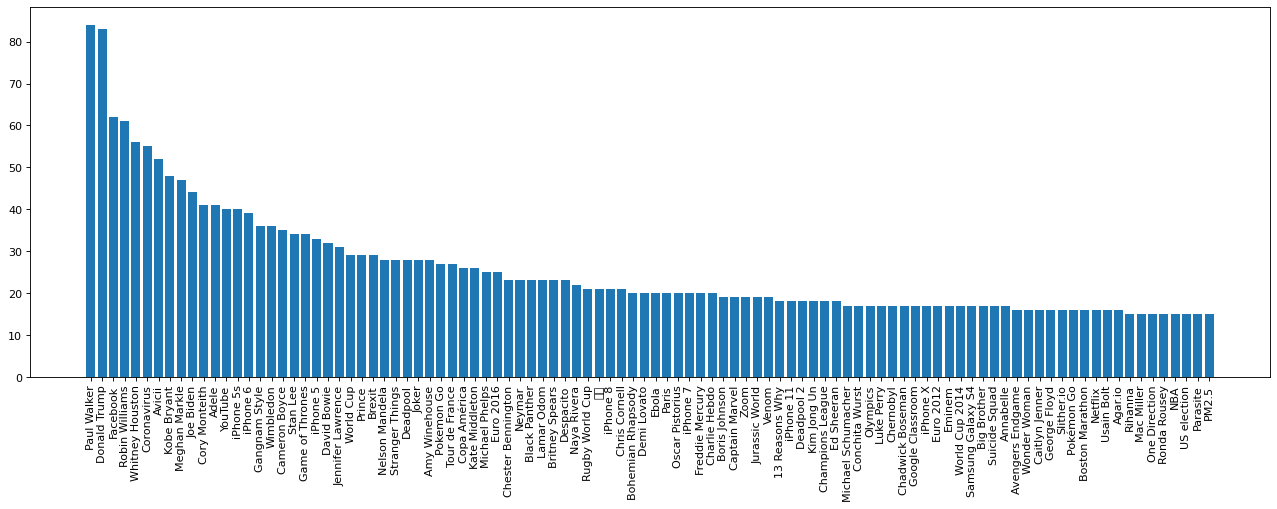

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

query_frequency_test = query_frequency.toPandas()
category_frequency_test = category_frequency.toPandas()
print(query_frequency_test)
plt.bar(query_frequency_test["query"][0:100], query_frequency_test["query_count"][0:100])
plt.xticks(rotation=90)
plt.show()

Визуализация данных позволяет лучше понять и интерпретировать результаты анализа.

#Визуализация частоты встречаемости категории

(-1.0999999999997376,
 1.0999999999999874,
 -1.0999999888557792,
 1.0999997660543552)

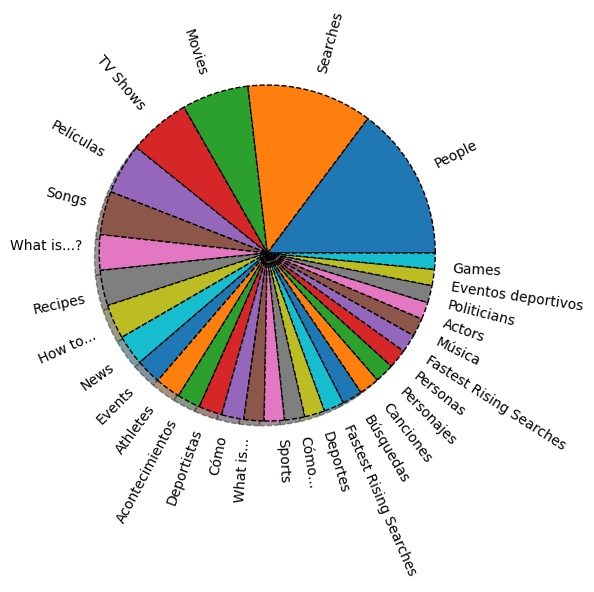

In [ ]:
fig, ax = plt.subplots()
ax.pie(category_frequency_test["category_count"][0:30], labels=category_frequency_test["category"][0:30], shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

Это помогает наглядно представить, какие категории запросов являются наиболее популярными.

#Облако слов датасета

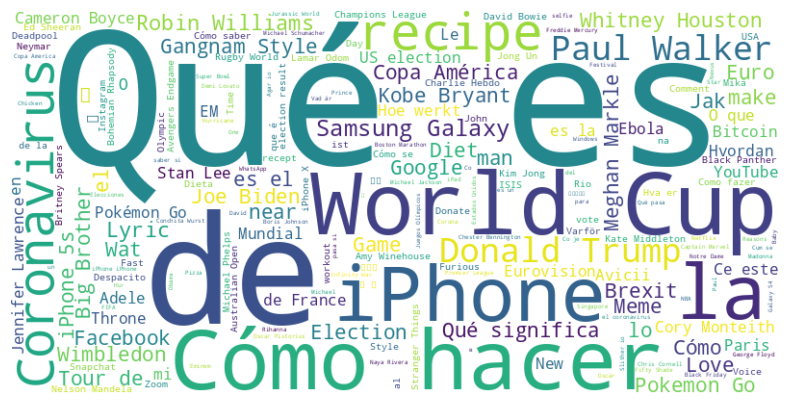

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

queries = df.select("query").rdd.flatMap(lambda x: x).collect()

text = " ".join(queries)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Облако слов позволяет визуализировать наиболее часто встречающиеся слова в запросах, помогая быстро определить ключевые темы и интересы пользователей.

#Облако слов датасета в форме логотипа

<ipython-input-79-b4df7e9a0bf9>:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = binary_image.resize([2000, 2000], Image.ANTIALIAS)


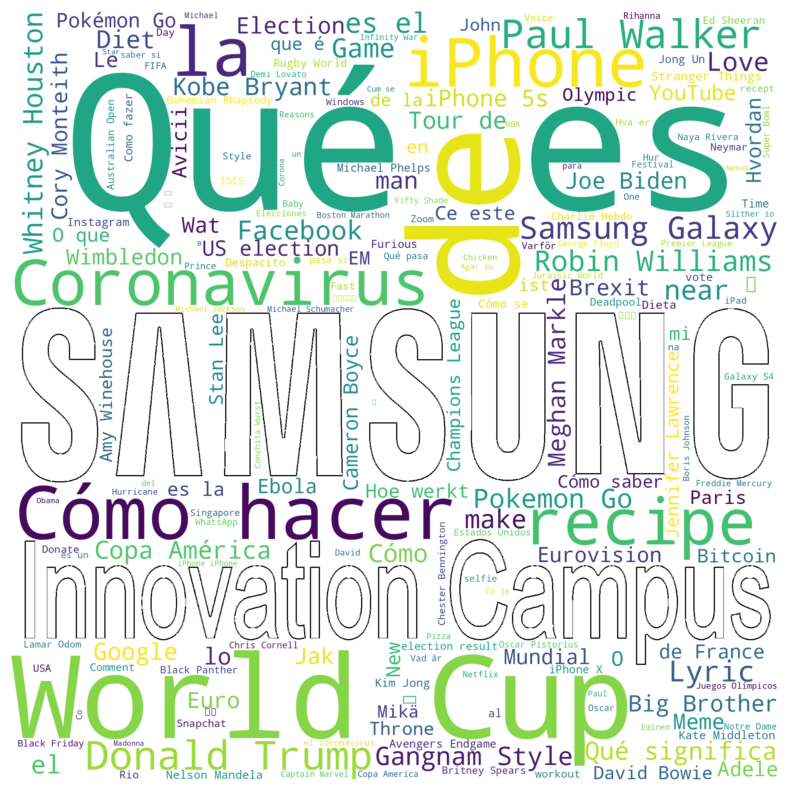

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the original image
original_image = Image.open('Samsung-logo-12.png')

# Convert to grayscale
gray_image = original_image.convert("L")

# Apply a threshold to get a binary image (black and white)
# Here, we use a lower threshold to ensure dark parts are considered as mask
threshold = 128
binary_image = gray_image.point(lambda p: p < threshold and 255)

# Resize the binary image to desired size
resized_image = binary_image.resize([2000, 2000], Image.ANTIALIAS)

# Convert image to numpy array
mask = np.array(resized_image)

# Collect all the queries into a single list
queries = df.select("query").rdd.flatMap(lambda x: x).collect()

# Join all queries into a single string
text_corpus = " ".join(queries)

# Generate the word cloud with the mask
wordcloud = WordCloud(width=2000, height=2000, background_color='white', mask=mask, contour_width=1, contour_color='black').generate(text_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Этот метод визуализации позволяет создать привлекательное и запоминающееся представление данных, что может быть полезно для презентаций и отчетов.